In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Convolutional Neural Networks applied to classification.

In [2]:
import pickle
(train_x, train_y), (test_x, test_y) = pickle.load(open("mnist.pkl", "rb"))

In [3]:
train_X = np.zeros((60000,32,32))
test_X = np.zeros((10000,32,32))
# normalizing the data
for i in range(60000):
    train_X[i] = train_x[i]/np.amax(train_x[i])
for j in range(10000):
    test_X[j] = test_x[j]/np.amax(test_x[j])

In [4]:
train_X.shape

(60000, 32, 32)

In [5]:
test_X.shape

(10000, 32, 32)

### Question a)

The dimension of input is $32 \times 32 \times 1$


Equation use to calculate output:
$$
H_{\text {out }}=\left[\frac{H_{\text {in }}+2 \times \text { padding }-\operatorname{dilation} \times(\text { kernel_size }-1)-1}{\text { stride }}+1\right]
$$

In [6]:
Hin_a = 32

In [7]:
def dimCalc(Hin,padding,dilation,kernel_size,stride):
    Hout = (Hin + 2*padding - dilation*(kernel_size - 1) - 1)/stride + 1
    return Hout

### i)

In [8]:
padding_ai = 0
dilation_ai = 1
kernel_size_ai = 2
stride_ai = 2

In [9]:
Hout_ai = dimCalc(Hin_a,padding_ai,dilation_ai,
                  kernel_size_ai,stride_ai)
Hout_ai

16.0

Because the number of filters are 33, the out put for question a part i is $16 \times 16 \times 1 \times 33$ 

### ii)

In [10]:
padding_aii = 1
dilation_aii = 1
kernel_size_aii = 3
stride_aii = 1

In [11]:
Hout_aii = dimCalc(Hout_ai,padding_aii,dilation_aii,
                   kernel_size_aii,stride_aii)
Hout_aii

16.0

Because the number of filters 55, the out put of question a part ii is $16 \times 16 \times 1 \times 55$

### iii)

In [12]:
padding_aiii = 1
dilation_aiii = 1
kernel_size_aiii = 3
stride_aiii = 1

In [13]:
Hout_aiii = dimCalc(Hout_aii,padding_aiii,dilation_aiii,
                    kernel_size_aiii,stride_aiii)
Hout_aiii

16.0

Followed by a Max Pooling with filter size of 2x2 and stride 2

In [14]:
padding_aiii_maxpol = 0
dilation_aiii_maxpol = 1
kernel_size_aiii_maxpol = 2
stride_aiii_maxpol = 2

In [15]:
Hout_aiii = dimCalc(Hout_aiii,padding_aiii_maxpol,dilation_aiii_maxpol,
                    kernel_size_aiii_maxpol,stride_aiii_maxpol)
Hout_aiii

8.0

Because the number of filters 77, the out put of question a part iii is $8 \times 8 \times 1 \times 77$

### Question b)

In [16]:
Hin_b = 32

### i)

In [17]:
padding_bi = 0
dilation_bi = 1
kernel_size_bi = 2
stride_bi = 2

In [18]:
Hout_bi = dimCalc(Hin_b,padding_bi,dilation_bi,
                  kernel_size_bi,stride_bi)
Hout_bi

16.0

Because the number of filters are 33, the out put for question b part i is $16 \times 16 \times 3 \times 33$ 

### ii)

In [19]:
padding_bii = 1
dilation_bii = 1
kernel_size_bii = 3
stride_bii = 1

In [20]:
Hout_bii = dimCalc(Hout_bi,padding_bii,dilation_bii,
                   kernel_size_bii,stride_bii)
Hout_bii

16.0

Followed by a max pooling layer of kernel size 3x3, stride of 1, padding of 0

In [21]:
padding_bii_maxpol = 0
dilation_bii_maxpol = 1
kernel_size_bii_maxpol = 3
stride_bii_maxpol = 1

In [22]:
Hout_bii = dimCalc(Hout_bii,padding_bii_maxpol,dilation_bii_maxpol,
                   kernel_size_bii_maxpol,stride_bii_maxpol)
Hout_bii

14.0

Because the number of filters 55, the out put of question b part ii is $14 \times 14 \times 3 \times 55$

### iii)

In [23]:
padding_biii = 1
dilation_biii = 1
kernel_size_biii = 3
stride_biii = 1

In [24]:
Hout_biii = dimCalc(Hout_bii,padding_biii,dilation_biii,
                    kernel_size_biii,stride_biii)
Hout_biii

14.0

Followed by a Max Pooling with filter size of 2x2 and stride 2

In [25]:
padding_biii_maxpol = 0
dilation_biii_maxpol = 1
kernel_size_biii_maxpol = 2
stride_biii_maxpol = 2

In [26]:
Hout_biii = dimCalc(Hout_biii,padding_biii_maxpol,dilation_biii_maxpol,
                    kernel_size_biii_maxpol,stride_biii_maxpol)
Hout_biii

7.0

Because the number of filters 77, the out put of question b part iii is $7 \times 7 \times 3 \times 77$

### Question c)

In [27]:
from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r  took: %2.4f sec' % (f.__name__,  te-ts))
        return result
    return wrap

In [28]:
from torch.optim import SGD, Adam
import torch.nn.functional as F
import random
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split

def create_chunks(complete_list, chunk_size=None, num_chunks=None):
    '''
    Cut a list into multiple chunks, each having chunk_size (the last chunk might be less than chunk_size) 
    or having a total of num_chunk chunks
    '''
    chunks = []
    if num_chunks is None:
        num_chunks = math.ceil(len(complete_list) / chunk_size)
    elif chunk_size is None:
        chunk_size = math.ceil(len(complete_list) / num_chunks)
    for i in range(num_chunks):
        chunks.append(complete_list[i * chunk_size: (i + 1) * chunk_size])
    return chunks

class Trainer():
    def __init__(self, model, optimizer_type, learning_rate, epoch, batch_size, input_transform=lambda x: x,):
        """ 
        The class for training the model
        model: nn.Module
            A pytorch model
        optimizer_type: 'adam' or 'sgd'
        learning_rate: float
        epoch: int
        batch_size: int
        input_transform: func
            transforming input. Can do reshape here
        """
        self.model = model
        if optimizer_type == "sgd":
            self.optimizer = SGD(model.parameters(), learning_rate,momentum=0.9)
        elif optimizer_type == "adam":
            self.optimizer = Adam(model.parameters(), learning_rate)
            
        self.epoch = epoch
        self.batch_size = batch_size
        self.input_transform = input_transform


    @timing
    def train(self, inputs, outputs, val_inputs, val_outputs,early_stop=False,l2=False,silent=False):
        """ 
        train self.model with specified arguments
        inputs: np.array, The shape of input_transform(input) should be (ndata,nfeatures)
        outputs: np.array shape (ndata,)
        val_nputs: np.array, The shape of input_transform(val_input) should be (ndata,nfeatures)
        val_outputs: np.array shape (ndata,)
        early_stop: bool
        l2: bool
        silent: bool. Controls whether or not to print the train and val error during training
        """
        inputs = self.input_transform(torch.tensor(inputs, dtype=torch.float))
        outputs = torch.tensor(outputs, dtype=torch.int64)
        val_inputs = self.input_transform(torch.tensor(val_inputs, dtype=torch.float))
        val_outputs = torch.tensor(val_outputs, dtype=torch.int64)

        losses = []
        accuracies = []
        val_losses = []
        val_accuracies = []
        weights = self.model.state_dict()
        lowest_val_loss = np.inf
        
        for n_epoch in tqdm(range(self.epoch), leave=False):
            self.model.train()
            batch_indices = list(range(inputs.shape[0]))
            random.shuffle(batch_indices)
            batch_indices = create_chunks(batch_indices, chunk_size=self.batch_size)
            epoch_loss = 0
            epoch_acc = 0
            for batch in batch_indices:
                batch_importance = len(batch) / len(outputs)
                batch_input = inputs[batch]
                batch_output = outputs[batch]
                batch_predictions = self.model(batch_input)
                loss = nn.CrossEntropyLoss()(batch_predictions, batch_output)
                if l2:
                    ### Compute the loss with L2 regularization ###
                    l2_lambda = 1e-5
                    l2_norm = sum([p.pow(2.0).sum() for p in model.parameter()])
                    loss += l2_norm * l2_lambda
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.detach().cpu().item() * batch_importance
                acc = np.true_divide(torch.sum(torch.argmax(batch_predictions, axis=-1) == batch_output),len(batch_predictions))
                epoch_acc += acc.detach().cpu().item() * batch_importance
            val_loss, val_acc = self.evaluate(val_inputs, val_outputs, print_acc=False)
            if n_epoch % 10 ==0 and not silent: 
                print("Epoch %d/%d - Loss: %.3f - Acc: %.3f" % (n_epoch + 1, self.epoch, epoch_loss, epoch_acc))
                print("              Val_loss: %.3f - Val_acc: %.3f" % (val_loss, val_acc))
            losses.append(epoch_loss)
            accuracies.append(epoch_acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            if early_stop:
                if val_loss < lowest_val_loss:
                    lowest_val_loss = val_loss
                    weights = self.model.state_dict()

        if early_stop:
            self.model.load_state_dict(weights)    

        return {"losses": losses, "accuracies": accuracies, "val_losses": val_losses, "val_accuracies": val_accuracies}
        
    def evaluate(self, inputs, outputs, print_acc=True):
        if torch.is_tensor(inputs):
            inputs = self.input_transform(inputs)
        else:
            inputs = self.input_transform(torch.tensor(inputs, dtype=torch.float))
            outputs = torch.tensor(outputs, dtype=torch.int64)
        self.model.eval()
        batch_indices = list(range(inputs.shape[0]))
        batch_indices = create_chunks(batch_indices, chunk_size=self.batch_size)
        acc = 0
        losses = 0
        for batch in batch_indices:
            batch_importance = len(batch) / len(outputs)
            batch_input = inputs[batch]
            batch_output = outputs[batch]
            with torch.no_grad():
                batch_predictions = self.model(batch_input)
                loss = nn.CrossEntropyLoss()(batch_predictions, batch_output)
            # compute accuracy of classification 
            batch_acc = np.true_divide(torch.sum(torch.argmax(batch_predictions, axis=-1) == batch_output), len(batch_predictions))
            losses += loss.detach().cpu().item() * batch_importance
            acc += batch_acc.detach().cpu().item() * batch_importance
        if print_acc:
            print("Accuracy: %.3f" % acc)
        return losses, acc

In [29]:
from sklearn.model_selection import train_test_split,KFold
def Kfold(model_func,k,Xs,ys,test_Xs,test_ys,epochs,draw_curve=True,early_stop=False,batchsize=128, optimizer='adam',lr=1e-3,l2=False,
          input_shape=(-1,1024)):
    """ Do Kfold cross validation with the specified arguments
    model_func: function. 
        Constructor of the model.
    k: int. The number of fold
    Xs: np.array, The shape of Xs.reshape(input_shape) should be (ndata,nfeatures)
    ys: np.array shape (ndata,)
    test_Xs: np.array, The shape of test_Xs.reshape(input_shape) should be (ndata,nfeatures)
    test_ys: np.array shape (ndata,)
    epoch: int
    batch_size: int
    early_stop: bool
    lr: float. learning_rate
    l2: bool
    optimizer: 'adam' or 'sgd'
    input_shape: tuple
    """
    # reshape
    Xs = Xs.reshape(input_shape)
    test_Xs = test_Xs.reshape(input_shape)
    
    # The total number of examples for training the network
    total_num=len(Xs)
    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    train_acc_all=[]
    test_acc_all=[]
    fold=0
    # the following part is the k-fold operation
    for train_selector,val_selector in kf.split(range(total_num)):
        fold+=1
        print(f'Fold #{fold}')
        # Decide training examples and validation examples for this fold
        train_Xs=Xs[train_selector]
        val_Xs=Xs[val_selector]
        train_ys=ys[train_selector]
        val_ys=ys[val_selector]
        
        model=model_func()
        ### Use the trainer class to train the model ###
        trainer = Trainer(model,optimizer,lr,epochs,batchsize)
        log = trainer.train(train_Xs,train_ys,val_Xs,val_ys)
        
        if draw_curve:
            plt.figure()
            plt.plot(log["losses"], label="losses")
            plt.plot(log["val_losses"], label="validation_losses")
            plt.legend()
            plt.title(f'Fold #{fold} loss')

            plt.figure()
            plt.plot(log["accuracies"], label="accuracies")
            plt.plot(log["val_accuracies"], label="validation_accuracies")
            plt.legend()
            plt.title(f'Fold #{fold} accuracy')
        
        # Report result for this fold
        if early_stop:
            report_idx= np.argmin(log["val_losses"])      
        else:
            report_idx=-1
        test_acc=trainer.evaluate(test_Xs,test_ys,print_acc=False)[1]
        train_acc_all.append(log["accuracies"][report_idx])
        test_acc_all.append(test_acc)
        print("Train accuracy:",log["accuracies"][report_idx])
        print("Validation accuracy:",log["val_accuracies"][report_idx])
        print("Test accuracy:",test_acc)
        
    print("Final results:")
    print("Training accuracy:%f+-%f"%(np.average(train_acc_all),np.std(train_acc_all)))
    print("Testing accuracy:%f+-%f"%(np.average(test_acc_all),np.std(test_acc_all)))

In [30]:
Hin_c = 32
padding_c = 2
dilation_c = 1
kernel_size_c = 5
stride_c = 1
Hout_c = dimCalc(Hin_c,padding_c,dilation_c,kernel_size_c,stride_c)
Hout_c

32.0

In [31]:
from torch import nn
import torch
class CNN_FC_Net_Qc(nn.Module):
    def __init__(self):
        super(CNN_FC_Net_Qc, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1,3,kernel_size=5,stride=1,padding=2),
            nn.Flatten(),
            nn.Linear(3*32**2,90),
            nn.ReLU(),
            nn.Linear(90,10),
            nn.Softmax(dim=-1),
        )
        
    def forward(self, x):
        return self.layers(x)

In [32]:
model = CNN_FC_Net_Qc()

Fold #1


  2%|▏         | 1/50 [00:15<12:26, 15.24s/it]

Epoch 1/50 - Loss: 1.693 - Acc: 0.786
              Val_loss: 1.628 - Val_acc: 0.839


 22%|██▏       | 11/50 [04:38<19:12, 29.56s/it]

Epoch 11/50 - Loss: 1.491 - Acc: 0.972
              Val_loss: 1.497 - Val_acc: 0.965


 42%|████▏     | 21/50 [09:19<13:36, 28.16s/it]

Epoch 21/50 - Loss: 1.480 - Acc: 0.982
              Val_loss: 1.492 - Val_acc: 0.969


 62%|██████▏   | 31/50 [13:46<08:31, 26.90s/it]

Epoch 31/50 - Loss: 1.474 - Acc: 0.988
              Val_loss: 1.490 - Val_acc: 0.971


 82%|████████▏ | 41/50 [18:35<04:12, 28.00s/it]

Epoch 41/50 - Loss: 1.472 - Acc: 0.989
              Val_loss: 1.489 - Val_acc: 0.972


func:'train'  took: 1407.2649 sec
Train accuracy: 0.9909249999999997
Validation accuracy: 0.9711999999999986
Test accuracy: 0.9728000000000007
Fold #2


  2%|▏         | 1/50 [00:26<21:42, 26.58s/it]

Epoch 1/50 - Loss: 1.671 - Acc: 0.810
              Val_loss: 1.559 - Val_acc: 0.907


 22%|██▏       | 11/50 [05:03<17:55, 27.58s/it]

Epoch 11/50 - Loss: 1.489 - Acc: 0.973
              Val_loss: 1.503 - Val_acc: 0.959


 42%|████▏     | 21/50 [09:54<13:37, 28.18s/it]

Epoch 21/50 - Loss: 1.478 - Acc: 0.984
              Val_loss: 1.494 - Val_acc: 0.967


 62%|██████▏   | 31/50 [14:58<09:14, 29.17s/it]

Epoch 31/50 - Loss: 1.473 - Acc: 0.988
              Val_loss: 1.491 - Val_acc: 0.970


 82%|████████▏ | 41/50 [20:58<05:13, 34.80s/it]

Epoch 41/50 - Loss: 1.471 - Acc: 0.990
              Val_loss: 1.491 - Val_acc: 0.970


func:'train'  took: 1548.0335 sec
Train accuracy: 0.9914750000000001
Validation accuracy: 0.9706499999999985
Test accuracy: 0.9723000000000006
Fold #3


  2%|▏         | 1/50 [00:29<24:03, 29.45s/it]

Epoch 1/50 - Loss: 1.634 - Acc: 0.847
              Val_loss: 1.548 - Val_acc: 0.918


 22%|██▏       | 11/50 [05:20<17:41, 27.21s/it]

Epoch 11/50 - Loss: 1.488 - Acc: 0.974
              Val_loss: 1.499 - Val_acc: 0.963


 42%|████▏     | 21/50 [10:23<17:15, 35.70s/it]

Epoch 21/50 - Loss: 1.476 - Acc: 0.986
              Val_loss: 1.491 - Val_acc: 0.970


 62%|██████▏   | 31/50 [15:09<08:02, 25.37s/it]

Epoch 31/50 - Loss: 1.472 - Acc: 0.990
              Val_loss: 1.488 - Val_acc: 0.974


 82%|████████▏ | 41/50 [19:00<03:26, 22.97s/it]

Epoch 41/50 - Loss: 1.469 - Acc: 0.992
              Val_loss: 1.488 - Val_acc: 0.974


func:'train'  took: 1378.0582 sec
Train accuracy: 0.9925250000000003
Validation accuracy: 0.9733499999999983
Test accuracy: 0.9710000000000005
Final results:
Training accuracy:0.991642+-0.000664
Testing accuracy:0.972033+-0.000759


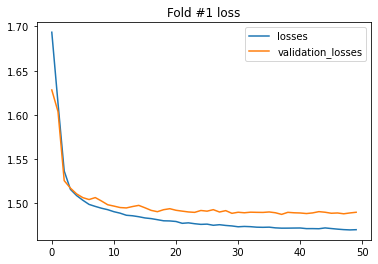

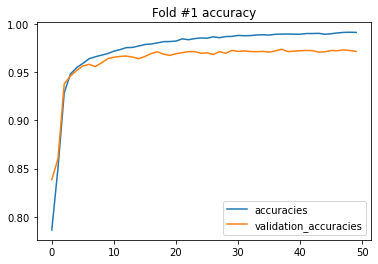

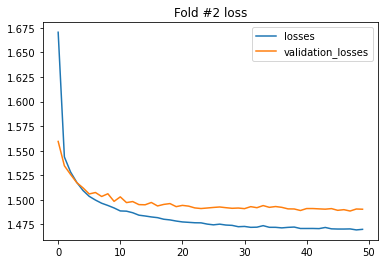

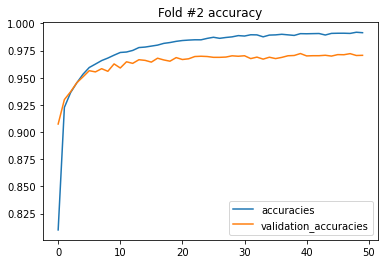

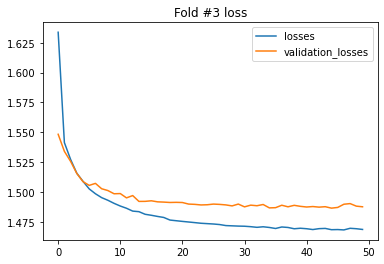

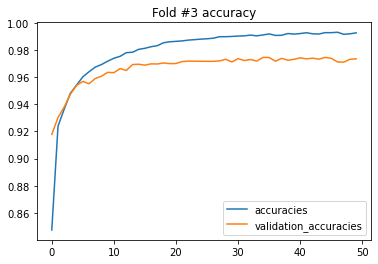

In [33]:
Kfold(CNN_FC_Net_Qc,3,train_X,train_y,test_X,test_y,
      epochs=50,input_shape=(-1,1,32,32),l2=True)

The testing accuracy for this Convolutional Neural Network is 0.972033 $\pm$ 0.000759; from the figure shown above, the model might be a little bit overfitting.

### Question d)

In [34]:
from torch import nn
import torch
class CNN_FC_Net_Qd(nn.Module):
    def __init__(self):
        super(CNN_FC_Net_Qd, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(8,16,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(16*6**2,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10),
            nn.Softmax(dim=-1),
        )
        
    def forward(self, x):
        return self.layers(x)

Fold #1


  2%|▏         | 1/50 [00:39<31:58, 39.15s/it]

Epoch 1/50 - Loss: 1.848 - Acc: 0.624
              Val_loss: 1.711 - Val_acc: 0.751


 22%|██▏       | 11/50 [05:26<18:34, 28.57s/it]

Epoch 11/50 - Loss: 1.478 - Acc: 0.984
              Val_loss: 1.483 - Val_acc: 0.979


 42%|████▏     | 21/50 [10:03<13:17, 27.51s/it]

Epoch 21/50 - Loss: 1.471 - Acc: 0.990
              Val_loss: 1.485 - Val_acc: 0.977


 62%|██████▏   | 31/50 [14:31<08:31, 26.90s/it]

Epoch 31/50 - Loss: 1.468 - Acc: 0.994
              Val_loss: 1.478 - Val_acc: 0.983


 82%|████████▏ | 41/50 [19:09<04:10, 27.79s/it]

Epoch 41/50 - Loss: 1.466 - Acc: 0.995
              Val_loss: 1.474 - Val_acc: 0.987


func:'train'  took: 1420.4927 sec
Train accuracy: 0.9957749999999989
Validation accuracy: 0.987399999999998
Test accuracy: 0.989400000000001
Fold #2


  2%|▏         | 1/50 [00:24<19:59, 24.48s/it]

Epoch 1/50 - Loss: 1.724 - Acc: 0.758
              Val_loss: 1.544 - Val_acc: 0.921


 22%|██▏       | 11/50 [04:54<19:18, 29.71s/it]

Epoch 11/50 - Loss: 1.480 - Acc: 0.982
              Val_loss: 1.483 - Val_acc: 0.979


 42%|████▏     | 21/50 [10:25<16:48, 34.79s/it]

Epoch 21/50 - Loss: 1.471 - Acc: 0.990
              Val_loss: 1.478 - Val_acc: 0.983


 62%|██████▏   | 31/50 [16:40<13:04, 41.28s/it]

Epoch 31/50 - Loss: 1.468 - Acc: 0.993
              Val_loss: 1.477 - Val_acc: 0.984


 82%|████████▏ | 41/50 [23:53<06:22, 42.47s/it]

Epoch 41/50 - Loss: 1.467 - Acc: 0.994
              Val_loss: 1.476 - Val_acc: 0.985


func:'train'  took: 1790.9661 sec
Train accuracy: 0.9950749999999994
Validation accuracy: 0.9860999999999979
Test accuracy: 0.9888000000000009
Fold #3


  2%|▏         | 1/50 [00:29<24:19, 29.79s/it]

Epoch 1/50 - Loss: 1.723 - Acc: 0.755
              Val_loss: 1.613 - Val_acc: 0.850


 22%|██▏       | 11/50 [06:06<23:14, 35.77s/it]

Epoch 11/50 - Loss: 1.475 - Acc: 0.986
              Val_loss: 1.483 - Val_acc: 0.978


 42%|████▏     | 21/50 [11:06<13:32, 28.03s/it]

Epoch 21/50 - Loss: 1.471 - Acc: 0.990
              Val_loss: 1.477 - Val_acc: 0.984


 62%|██████▏   | 31/50 [15:33<09:21, 29.54s/it]

Epoch 31/50 - Loss: 1.468 - Acc: 0.994
              Val_loss: 1.474 - Val_acc: 0.986


 82%|████████▏ | 41/50 [20:23<04:29, 29.95s/it]

Epoch 41/50 - Loss: 1.466 - Acc: 0.995
              Val_loss: 1.474 - Val_acc: 0.987


func:'train'  took: 1514.5724 sec
Train accuracy: 0.9956749999999993
Validation accuracy: 0.9846999999999981
Test accuracy: 0.9864000000000013
Final results:
Training accuracy:0.995508+-0.000309
Testing accuracy:0.988200+-0.001296


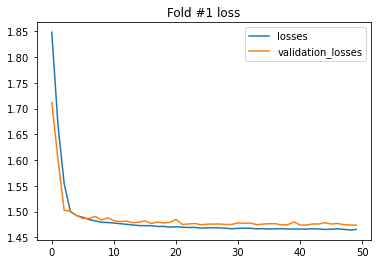

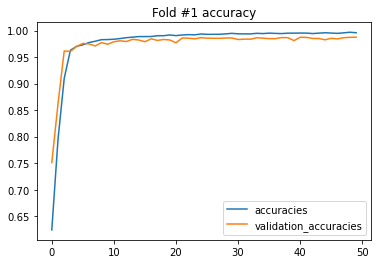

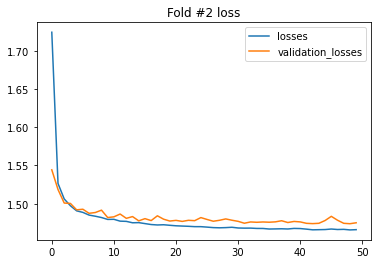

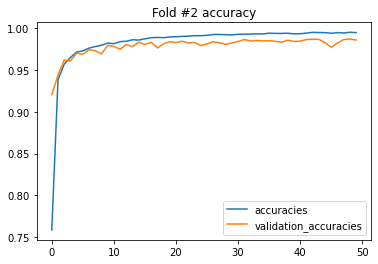

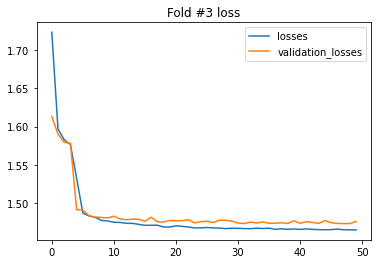

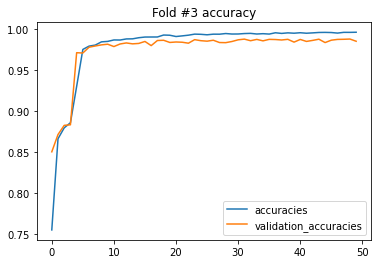

In [35]:
Kfold(CNN_FC_Net_Qd,3,train_X,train_y,test_X,test_y,
      epochs=50,input_shape=(-1,1,32,32),l2=True)

The testing accuracy for this Convolutional Neural Network is 0.988200 $\pm$ 0.001296; from the figure shown above, the model show no sign of underfitting or overfitting.